# Predicting the Severity of a Traffic Collision in Los Angeles

## 1. Introduction

The primary goal of this capstone project is to investigate which factors could effectively determine and predict the degree of traffic accident severity  in Los Angeles, one of the largest cities in USA. It could help the government to make constructive decisions about transportation prior to any unusual circumstances.In this notebook, I specify the data preprocessing, exploratory data analysis, machine learning algorithms, and model evaluations step-by-step, which detail the process of generating my empirical results for my studies. 

## 2. Data

This section describes the source and use of data. The dataset is retrieved from [Kaggle.com](https://www.kaggle.com/sobhanmoosavi/us-accidents), which contain around 3.5 million records of traffic accidents in the United States from 2016 to mid-2020, and those in Los Angeles are of my main interest. In this section, I show how to import dataset, select features and observations, and cleanse dataset. 

### 2.1 Data Importing

In this part, I show how to import uploaded data and display some rows of it.

In [1]:
# Import necessary libraries for importing Data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

After we download the dataset from Kaggle.com, I upload it to IBM Watson Studio, then I put the codes of uploaded dataset in the cell below for further use. **Note: Since these codes are senstive, they disappear after the share of notebook**.

In [2]:
# The code was removed by Watson Studio for sharing.

Then, I use <code>read_csv()</code> function to read the dataset and show top five rows using <code>df.head()</code>.

In [3]:
df = pd.read_csv(body)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### 2.2 Data Selection

This part describes how to select necessary features and observations. For example, I only look at the traffic records in **Los Angeles**, and the features are like weather conditions, road locations, and period of the day (i.e. daytime/night).

In [4]:
# Display all attributes
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
# Select relevant attributes
df_use = df[['City','Severity','Temperature(F)','Humidity(%)', 'Pressure(in)','Visibility(mi)','Wind_Speed(mph)',
             'Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop',
            'Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']]

# Set City as Index
df_use.set_index(['City'], inplace = True)

In [6]:
# Select observations which are traffic accident records in Los Angeles
df_use_LA = df_use.loc['Los Angeles',:]
df_use_LA.head()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
City,,,,,,,,,,,,,,,,,,,,,
Los Angeles,2,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,True,False,False,False,False,False,False,False,False,Day
Los Angeles,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,False,False,False,False,False,False,False,False,False,Day
Los Angeles,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,True,False,False,False,False,False,False,False,False,Day
Los Angeles,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,False,False,False,False,False,False,False,False,False,Day
Los Angeles,3,80.1,52.0,29.96,10.0,9.2,Clear,False,False,False,...,False,False,False,False,False,False,False,False,False,Day


In [7]:
# Show data type of each attribute in this new DataFrame
df_use_LA.dtypes

Severity               int64
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
dtype: object

### 2.3 Data Cleansing and Wrangling

In this part, I convert data from the initial format to a more appropriate one for my empirical studies. For example, I show how to handle any missing values and create dummies if the attribute is non-numerical. At the beginning, I identify any missing values for each variable using a for-loop, and the codes are shown below:

#### 2.3.1 Dealing with Missing Values

In [8]:
# Create a DataFrame for whether the row is missing
missing_data = df_use_LA.isnull()

# Print the missing value information for each variable
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Severity
False    79169
Name: Severity, dtype: int64

Temperature(F)
False    78737
True       432
Name: Temperature(F), dtype: int64

Humidity(%)
False    78705
True       464
Name: Humidity(%), dtype: int64

Pressure(in)
False    78853
True       316
Name: Pressure(in), dtype: int64

Visibility(mi)
False    78880
True       289
Name: Visibility(mi), dtype: int64

Wind_Speed(mph)
False    56866
True     22303
Name: Wind_Speed(mph), dtype: int64

Weather_Condition
False    78882
True       287
Name: Weather_Condition, dtype: int64

Amenity
False    79169
Name: Amenity, dtype: int64

Bump
False    79169
Name: Bump, dtype: int64

Crossing
False    79169
Name: Crossing, dtype: int64

Give_Way
False    79169
Name: Give_Way, dtype: int64

Junction
False    79169
Name: Junction, dtype: int64

No_Exit
False    79169
Name: No_Exit, dtype: int64

Railway
False    79169
Name: Railway, dtype: int64

Roundabout
False    79169
Name: Roundabout, dtype: int64

Station
False    79169
Name: Station, dt

Since there are indeed missing values for several attributes, we could replace them by mean if the variable is in integer, float, or boolean formats and by frequency if the variable is in string or object format. The cell below displays the corresponding codes.

In [9]:
# import numpy for missing value package
import numpy as np

# Calculate the average of variables containing missing values (integer or float variables only)
avg_temp = df_use_LA['Temperature(F)'].mean(axis=0) # Average temperature
avg_humi = df_use_LA['Humidity(%)'].mean(axis=0) # Average humidity
avg_pres = df_use_LA['Pressure(in)'].mean(axis=0)# Average air pressure
avg_visi = df_use_LA['Visibility(mi)'].mean(axis=0) # Average visiability
avg_windsp = df_use_LA['Wind_Speed(mph)'].mean(axis=0) # Average wind speed

# Replace missing values by mean values in each column
df_use_LA['Temperature(F)'].replace(np.nan, avg_temp, inplace = True)
df_use_LA['Humidity(%)'].replace(np.nan, avg_humi, inplace = True)
df_use_LA['Pressure(in)'].replace(np.nan, avg_pres, inplace = True)
df_use_LA['Visibility(mi)'].replace(np.nan, avg_visi, inplace = True)
df_use_LA['Wind_Speed(mph)'].replace(np.nan, avg_windsp, inplace = True)

# Count the frequency
df_use_LA['Weather_Condition'].value_counts()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Clear                           31691
Fair                            16257
Overcast                         6946
Partly Cloudy                    5270
Mostly Cloudy                    4776
Cloudy                           4567
Haze                             3923
Light Rain                       2138
Scattered Clouds                 1896
Rain                              608
Heavy Rain                        415
Fog                               211
Smoke                             100
Mist                               28
Patches of Fog                     18
Fair / Windy                       11
Blowing Dust                        5
Light Drizzle                       4
Light Rain / Windy                  4
Shallow Fog                         3
Thunderstorm                        2
Mostly Cloudy / Windy               2
Partly Cloudy / Windy               1
Light Rain with Thunder             1
Rain / Windy                        1
Drizzle                             1
Thunder     

We can see that a clear weather appears the most freqnently, we could replace missing values in "Weather_Condition" with clear. 

In [10]:
df_use_LA['Weather_Condition'].replace(np.nan, 'Clear',inplace=True)

Therefore, all missing values are handled. The next step is to get dummy values for categorical variables.

#### 2.3.2 Creating Dummy Variables

"Weather_Condition" and "Sunrise_Sunset" are two categorical variables, so we can create dummy variables for it, using <code>pd.get_dummies()</code> function. This is necessary if we want to do either regression or classification analysis. 

In [11]:
# Create dummy variables for weather condition
dummy_variable1 = pd.get_dummies(df_use_LA['Weather_Condition'])
dummy_variable2 = pd.get_dummies(df_use_LA['Sunrise_Sunset'])
# Concatenate original dataframe and dummy variable dataframe together.
df_LA = pd.concat([df_use_LA, dummy_variable1, dummy_variable2], axis = 1)

As a result, the dummy variables are created, and I have combined them with original dataframe 'df_use_LA' using <code>pd.concat()</code> method. 

#### 2.3.3 Drop Useless Variables

In [12]:
# Additionally, we could drop "City" because it is useless
df_LA.reset_index(inplace = True)
df_LA = df_LA.drop("City", axis = 1)

# Find other variables that could be dropped by using a correlation map
df_LA.corr()

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,...,Patches of Fog,Rain,Rain / Windy,Scattered Clouds,Shallow Fog,Smoke,Thunder,Thunderstorm,Day,Night
Severity,1.000000,-0.031889,0.079761,0.146930,0.005330,0.091743,0.044676,-0.003558,-0.099422,NaN,...,0.003851,-0.007800,-0.002632,0.039998,-0.000472,0.011206,-0.002632,0.001283,-0.044895,0.044895
Temperature(F),-0.031889,1.000000,-0.476901,-0.244666,0.176781,0.109926,-0.010209,-0.000813,-0.005084,NaN,...,-0.008490,-0.102513,-0.005010,-0.027448,0.000439,0.000515,-0.001852,-0.000051,0.417150,-0.417150
Humidity(%),0.079761,-0.476901,1.000000,-0.027659,-0.360934,-0.035687,0.004569,-0.002872,-0.004162,NaN,...,0.019330,0.107173,0.003783,0.062173,0.008058,-0.041173,-0.001433,0.003506,-0.316758,0.316758
Pressure(in),0.146930,-0.244666,-0.027659,1.000000,0.007286,0.106391,0.028665,-0.012955,-0.003042,NaN,...,0.010461,-0.050400,-0.004048,0.064103,-0.002326,0.016302,0.001589,0.002725,-0.035693,0.035693
Visibility(mi),0.005330,0.176781,-0.360934,0.007286,1.000000,0.085420,0.008533,0.003923,0.004661,NaN,...,-0.040671,-0.256835,-0.011063,0.028678,0.002774,0.007879,0.001602,-0.000294,0.008755,-0.008755
Wind_Speed(mph),0.091743,0.109926,-0.035687,0.106391,0.085420,1.000000,0.018760,-0.001119,-0.002420,NaN,...,0.006609,0.025750,0.017889,0.093593,0.001449,0.019764,0.005691,0.004128,0.230763,-0.230763
Amenity,0.044676,-0.010209,0.004569,0.028665,0.008533,0.018760,1.000000,-0.001093,0.007336,NaN,...,-0.001893,-0.000504,-0.000446,-0.002948,-0.000773,-0.001586,-0.000446,-0.000631,-0.008371,0.008371
Bump,-0.003558,-0.000813,-0.002872,-0.012955,0.003923,-0.001119,-0.001093,1.000000,-0.001548,NaN,...,-0.000131,-0.000766,-0.000031,-0.001364,-0.000054,-0.000310,-0.000031,-0.000044,0.003348,-0.003348
Crossing,-0.099422,-0.005084,-0.004162,-0.003042,0.004661,-0.002420,0.007336,-0.001548,1.000000,NaN,...,-0.002681,-0.004727,-0.000632,-0.007717,-0.001095,0.008121,-0.000632,-0.000894,-0.006703,0.006703
Give_Way,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that "Give_Way", "Turning_Loop", and "Roundabout" do not correlate with all other variables. The reason is that they have same values for all observations. Therefore, we could drop them from dataframe. 

In [13]:
df_LA.drop(['Give_Way','Roundabout','Turning_Loop'],axis = 1,inplace = True)

#### 2.3.4 Create Categorical Variable for Weekday or Weekend and Get its Dummies 

Whether the date is Monday, Tuesday, or Wednesday could also be a potential predictor of severity. Therefore, in this part, I create a categorical variable called "Weekday", using the start_time in original dataframe **df**. I also create dummies for it. 

In [14]:
df.set_index(['City'],inplace = True)

In [15]:
df_Los = df.loc['Los Angeles',:]
df_Los.reset_index(inplace = True)
df_Los['Start_Time'] = pd.to_datetime(df_Los['Start_Time'], errors='coerce')
df_Los['Weekday']=df_Los['Start_Time'].dt.strftime('%a')
df_weekday = df_Los['Weekday']
df_weekdummy = pd.get_dummies(df_Los['Weekday'])
df_LA = pd.concat([df_LA,df_weekday,df_weekdummy],axis = 1)
df_LA.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,...,Day,Night,Weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,2,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,1,0,Tue,0,0,0,0,0,1,0
1,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,1,0,Tue,0,0,0,0,0,1,0
2,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,1,0,Tue,0,0,0,0,0,1,0
3,3,82.9,47.0,29.95,10.0,4.6,Clear,False,False,False,...,1,0,Tue,0,0,0,0,0,1,0
4,3,80.1,52.0,29.96,10.0,9.2,Clear,False,False,False,...,1,0,Tue,0,0,0,0,0,1,0


All in all, the dataset have been cleansed as 'df_LA' and becomes ready for further analysis. 

## 3. Exploratory Data Analysis

In this section, I present the results from exploratory data analysis because it is useful to preliminarily determine the potential responsiveness of traffic accident severity to other variables and also appropriate machine learning algorithms (i.e. Regression or Classification) I should apply. I calculate some descriptive statistics and visualize the relationships between severity and other variables.

### 3.1 Descriptive Statistics

In this part, I calculate mean, median, mode, standard deviation, skewness, and kurtosis for all variables containing integers and floats. The results could help me to check the existance of potential outliers. Moreover, I use <code>groupby</code> function to calculate average severity under categorical variables (i.e. 'Weather_Condition', 'Sunrise_Sunset', 'Weekday').

#### 3.1.1 Summarize all Numerical Variables

In [16]:
# Calculating mean, median, and standard deviation
df_LA_sum = df_LA.describe()
df_LA_sum

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Blowing Dust,Clear,Cloudy,Drizzle,...,Thunderstorm,Day,Night,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,...,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.000000,79169.00000,79169.000000
mean,2.371812,66.690597,61.243936,29.899546,9.114769,4.868004,0.000063,0.403921,0.057687,0.000013,...,0.000025,0.649888,0.350112,0.166378,0.151814,0.101858,0.101125,0.158471,0.16533,0.155023
std,0.502009,9.002859,20.439883,0.157624,1.964459,3.205026,0.007947,0.490685,0.233152,0.003554,...,0.005026,0.477008,0.477008,0.372422,0.358843,0.302463,0.301497,0.365184,0.37148,0.361929
min,1.000000,37.900000,3.000000,28.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,60.100000,50.000000,29.810000,10.000000,3.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,66.000000,64.000000,29.910000,10.000000,4.868004,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,3.000000,72.000000,77.000000,30.000000,10.000000,5.800000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,4.000000,106.000000,100.000000,30.500000,10.000000,36.800000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [17]:
# Calculating Mode
df_LA_mode = df_LA.mode()
df_LA_mode.rename(index = {0: 'mode'}, inplace = True)
df_LA_mode

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,...,Day,Night,Weekday,Fri,Mon,Sat,Sun,Thu,Tue,Wed
mode,2,64.0,78.0,29.91,10.0,4.868004,Clear,False,False,False,...,1,0,Fri,0,0,0,0,0,0,0


In [18]:
# Calculating skewness
df_LA_skew = df_LA.skew().to_frame().transpose()
df_LA_skew.rename(index = {0:'skewness'}, inplace = True)
df_LA_skew

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Junction,...,Thunderstorm,Day,Night,Fri,Mon,Sat,Sun,Thu,Tue,Wed
skewness,0.737277,0.412176,-0.630247,-1.042389,-2.418455,0.907957,7.841426,114.857883,5.446677,2.237468,...,198.954769,-0.628468,0.628468,1.791677,1.940649,2.632728,2.64603,1.870493,1.801864,1.906375


In [19]:
# Calculating Kurtosis
df_LA_kurt = df_LA.kurtosis().to_frame().transpose()
df_LA_kurt.rename(index = {0:'kurtosis'}, inplace = True)
df_LA_kurt

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Junction,...,Thunderstorm,Day,Night,Fri,Mon,Sat,Sun,Thu,Tue,Wed
kurtosis,-0.932354,0.156365,-0.197879,4.390741,5.120041,2.948946,59.489458,13190.66654,27.666988,3.006338,...,39581.999899,-1.605069,-1.605069,1.210138,1.766162,4.931381,5.001602,1.498782,1.246747,1.634307


Now, we have calculated all necessary summary statistics. The next step is to concatenate all sample statistics together as a new single dataframe. Afterwards, I cleanse this dataframe and export it to excel, which should appear on the project report. 

In [20]:
# Combine these dataframes to a single one: 
df_LA_sumall = pd.concat([df_LA_sum,df_LA_mode,df_LA_skew,df_LA_kurt], axis=0, sort = False)

# Cleanse the new dataframe 
df_LA_sumall = df_LA_sumall[['Severity','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']]
df_LA_sumall.rename(index = {'50%':'median'},inplace = True)
df_LA_sumall.rename(index = {'25%':'1st quartile'},inplace = True)
df_LA_sumall.rename(index = {'75%':'3rd quartile'},inplace = True)


#Export them to excel
df_LA_sumall.to_excel('summary.xlsx')

df_LA_sumall.round(3)

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,79169.000,79169.000,79169.000,79169.000,79169.000,79169.000
mean,2.372,66.691,61.244,29.900,9.115,4.868
std,0.502,9.003,20.440,0.158,1.964,3.205
min,1.000,37.900,3.000,28.830,0.000,0.000
1st quartile,2.000,60.100,50.000,29.810,10.000,3.500
median,2.000,66.000,64.000,29.910,10.000,4.868
3rd quartile,3.000,72.000,77.000,30.000,10.000,5.800
max,4.000,106.000,100.000,30.500,10.000,36.800
mode,2.000,64.000,78.000,29.910,10.000,4.868
skewness,0.737,0.412,-0.630,-1.042,-2.418,0.908


#### 3.1.2 Grouping 

Calculate average severity by different categories.

In [21]:
df_group = df_LA[['Severity','Weather_Condition','Sunrise_Sunset','Weekday']]

# Calculate average severity, group by weather condition
df_group_weather = df_group.groupby(['Weather_Condition'], as_index = False).mean()
df_group_weather.round(3)

,Weather_Condition,Severity
0,Blowing Dust,2.000
1,Clear,2.456
2,Cloudy,2.263
3,Drizzle,2.000
4,Fair,2.201
5,Fair / Windy,2.273
6,Fog,2.412
7,Haze,2.358
8,Heavy Rain,2.239
9,Heavy T-Storm,2.000


In [22]:
# Calculate average severity group by the period of day
df_group_day = df_group.groupby(['Sunrise_Sunset'], as_index = False).mean()
df_group_day.round(3)

,Sunrise_Sunset,Severity
0,Day,2.355
1,Night,2.403


In [23]:
# Calculate average severity group by weekday
df_group_weekday = df_group.groupby(['Weekday'], as_index = False).mean()
df_group_weekday.round(3)

,Weekday,Severity
0,Fri,2.351
1,Mon,2.352
2,Sat,2.465
3,Sun,2.459
4,Thu,2.363
5,Tue,2.332
6,Wed,2.348


Alright, we have calculated descriptive statistics individually and by group. Next, we can discover potential relationships among variables using correlation analysis. 

### 3.2 Correlation Analysis

Calculating correlations using <code>df.corr()</code> method.

In [24]:
df_corr = df_LA[['Severity','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']]

# Calculate correlation matrix
df_corr.corr().round(3)

,Severity,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
Severity,1.000,-0.032,0.080,0.147,0.005,0.092
Temperature(F),-0.032,1.000,-0.477,-0.245,0.177,0.110
Humidity(%),0.080,-0.477,1.000,-0.028,-0.361,-0.036
Pressure(in),0.147,-0.245,-0.028,1.000,0.007,0.106
Visibility(mi),0.005,0.177,-0.361,0.007,1.000,0.085
Wind_Speed(mph),0.092,0.110,-0.036,0.106,0.085,1.000


We have calculated the above correlation matrix, and we can see that the correlations between severity and all other variables are weak. Therefore, regression method is not a useful technique in predicting the severity of traffic collisions. 

### 3.3 Data Visualization

Finally, I visualize the summary statistics and correlations I have obtained. I illustrate the reaction of severity to continuous variables through scatter plots, and I display the severity under categorical variables using box plots. 

#### 3.3.1 Scatter Plots

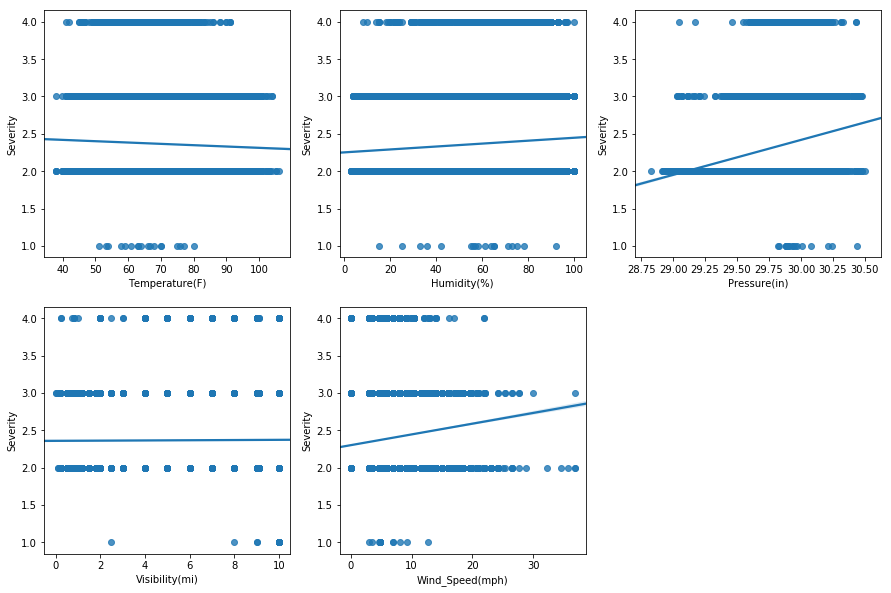

In [26]:
# Select features for data visualization
df_visual = df_LA[['Severity','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Weather_Condition','Sunrise_Sunset']]

# Import visualization packages (i.e. Matplotlib, Seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation between severity and each numerical variable, and combine all figures into a single one
plt.figure(figsize = (15,10))

plt.subplot(2,3,1)
sns.regplot(x = df_visual['Temperature(F)'],y = df_visual.Severity, data = df_visual)
plt.subplot(2,3,2)
sns.regplot(x = df_visual['Humidity(%)'],y = df_visual.Severity, data = df_visual)
plt.subplot(2,3,3)
sns.regplot(x = df_visual['Pressure(in)'],y = df_visual.Severity, data = df_visual)
plt.subplot(2,3,4)
sns.regplot(x = df_visual['Visibility(mi)'],y = df_visual.Severity, data = df_visual)
plt.subplot(2,3,5)
sns.regplot(x = df_visual['Wind_Speed(mph)'],y = df_visual.Severity, data = df_visual)
plt.show()

We can find that severity could be correlated with most variables, although the observations are obviously underfitted. Nevertheless, the correlation between severity and visibility is extremely close to zero. Thus, visibility does not seem like a good predictor of severity, and we could ignore it for machine learning process. 

#### 3.3.2 Boxplots

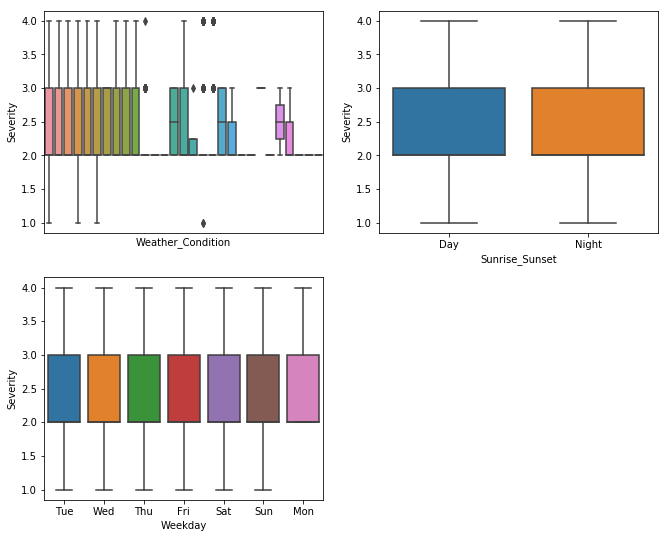

In [27]:
# Plot boxplots that illustrate relationship between severity and different categorical variables and combine them
plt.figure(figsize = (11,9))
plt.subplot(2,2,1)
sns.boxplot(x="Weather_Condition",y="Severity",data = df_LA)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.subplot(2,2,2)
sns.boxplot(x="Sunrise_Sunset",y="Severity",data = df_LA)
plt.subplot(2,2,3)
sns.boxplot(x="Weekday",y="Severity",data = df_LA)
plt.show()

Therefore, weather condition could be a potentially good predictor for traffic accident severity, but period of day and weekday are not, because the average and mean of severity under daytime and night are almost the same. In conclusion, the features we choose are temperature, humidity, pressure, wind speed, weather conditions, and road locations. 

## 4. Machine Learning Algorithms

In this section, I show how to train machine learning models for predicting severity and evaluate them using various accuracy scores. I apply five classification algorithms for my analysis, including K-Nearest Neighborhoods (KNN), Decision Tree, Logistic Regression, Support Vector Machine (SVM), and Random Forest. I split the dataset into training set and test set. I use training set to train the model under each algorithm, and the test set is to assess the quality and accuracy of each model. We first look at model training using each algorithm.

### 4.1 Model Training

I use training set to train the models. The first step is to select feature and target from <code>df_LA</code>. Also, we should normalize features using <code>scikit-learn</code> package. 

In [28]:
df_LA.columns

Index(['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Blowing Dust',
       'Clear', 'Cloudy', 'Drizzle', 'Fair', 'Fair / Windy', 'Fog', 'Haze',
       'Heavy Rain', 'Heavy T-Storm', 'Light Drizzle', 'Light Rain',
       'Light Rain / Windy', 'Light Rain with Thunder',
       'Light Thunderstorms and Rain', 'Mist', 'Mostly Cloudy',
       'Mostly Cloudy / Windy', 'Overcast', 'Partly Cloudy',
       'Partly Cloudy / Windy', 'Patches of Fog', 'Rain', 'Rain / Windy',
       'Scattered Clouds', 'Shallow Fog', 'Smoke', 'Thunder', 'Thunderstorm',
       'Day', 'Night', 'Weekday', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue',
       'Wed'],
      dtype='object')

In [29]:
# Target
y = df_LA['Severity'].values

# Feature
x = df_LA[['Temperature(F)', 'Humidity(%)', 'Pressure(in)','Wind_Speed(mph)','Amenity',
       'Bump', 'Crossing', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Blowing Dust',
       'Clear', 'Cloudy', 'Drizzle', 'Fair', 'Fair / Windy', 'Fog', 'Haze',
       'Heavy Rain', 'Heavy T-Storm', 'Light Drizzle', 'Light Rain',
       'Light Rain / Windy', 'Light Rain with Thunder',
       'Light Thunderstorms and Rain', 'Mist', 'Mostly Cloudy',
       'Mostly Cloudy / Windy', 'Overcast', 'Partly Cloudy',
       'Partly Cloudy / Windy', 'Patches of Fog', 'Rain', 'Rain / Windy',
       'Scattered Clouds', 'Shallow Fog', 'Smoke', 'Thunder', 'Thunderstorm']]

# Normalize features
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:2]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: DataConversionWarning: Data with input dtype bool, uint8, float64 were all converted to float64 by StandardScaler.


array([[ 1.80048432, -0.69687417,  0.32009595, -0.08362035, -0.12552094,
        -0.00870592, -0.17779765,  2.61921855, -0.03484348, -0.15978657,
        -0.20908404, -0.11826324, -0.00870592, -0.4071979 , -0.00794733,
         1.21479764, -0.24742312, -0.00355406, -0.50833903, -0.01178824,
        -0.05169436, -0.22833235, -0.07259183, -0.00355406, -0.00710826,
        -0.1665985 , -0.00710826, -0.00355406, -0.00355406, -0.01880954,
        -0.25337638, -0.00502624, -0.31011989, -0.26704597, -0.00355406,
        -0.01508023, -0.08797277, -0.00355406, -0.15664094, -0.0061559 ,
        -0.03556288, -0.00355406, -0.00502624],
       [ 1.80048432, -0.69687417,  0.32009595, -0.08362035, -0.12552094,
        -0.00870592, -0.17779765, -0.38179326, -0.03484348, -0.15978657,
        -0.20908404, -0.11826324, -0.00870592, -0.4071979 , -0.00794733,
         1.21479764, -0.24742312, -0.00355406, -0.50833903, -0.01178824,
        -0.05169436, -0.22833235, -0.07259183, -0.00355406, -0.00710826,
   

The second step is to use <code>train_test_split</code> to get training data and test data.

In [30]:
# Import train_test_split from scikit-learn
from sklearn.model_selection import train_test_split

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

Alright, we have obtained training set and test set for both feature and target. Then, we apply each classification algorithm to predict severity

#### 4.1.1 K-Nearest Neighbours

In [31]:
# First, we find the optimal k using for-loop

# Import KNN packages
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))

# Compute the accurary score under different k
for n in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

# Print the best accuracy score and value of k
print( "The best accuracy was with", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.6615 with k= 8


We can also plot the accurary score given the value of k.

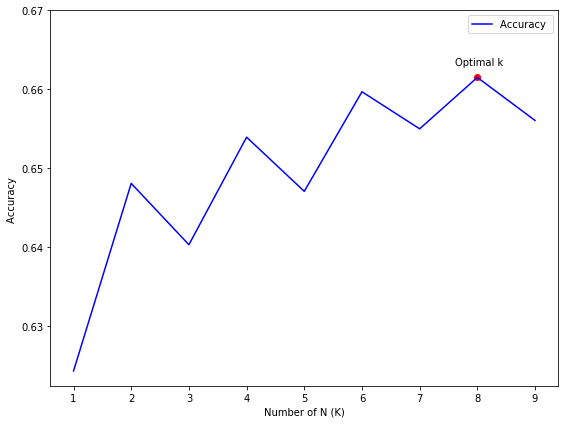

In [32]:
plt.figure(figsize = (8,6))
plt.plot(range(1,Ks),mean_acc,'blue')
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of N (K)')
plt.scatter(mean_acc.argmax()+1,mean_acc.max(),color = 'r')
plt.annotate('Optimal k',xy = (7.62,0.663))
plt.ylim(top = 0.67)
plt.tight_layout()
plt.show()

In [34]:
# Use training data to fit KNN model, after we find best number of nearest neighbors k = 8
knn1 = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [35]:
# Use test data to predict y, severity
yhat_knn = knn1.predict(x_test)
yhat_knn[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2])

#### 4.1.2 Decision Tree

In [36]:
# Import Decision Tree packages and fit it using training data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
# Use test data to predict y, severity
yhat_tree = tree.predict(x_test)
yhat_tree[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 4.1.3 Logistic Regression

In [38]:
# Import Logistic Regression packages and fit it using training data
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.01, solver='liblinear')
log.fit(x_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# Use test data to predict y, severity
yhat_log = log.predict(x_test)
yhat_log[:10]

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2])

#### 4.1.4 Support Vector Machine

In [40]:
# Import Support Vector Machine packages and fit it using training data
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(x_train, y_train) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
# Use test data to predict y, severity
yhat_svm = svm1.predict(x_test)
yhat_svm[:10]

array([2, 2, 2, 2, 3, 3, 2, 2, 2, 2])

#### 4.1.5 Random Forest

In [42]:
# Import Random Forest packages and fit it using training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
# Use test data to predict y, severity
yhat_forest = forest.predict(x_test)
yhat_forest[:10]

array([3, 2, 2, 2, 2, 2, 2, 2, 3, 2])

Therefore, we have computed predicted severity using different classification algorithms. The next step is to assess the correctness of each model. I will show this in **Section 4.2**.

### 4.2 Model Evaluation

I calculate Jaccard index and F1-score for all models. The model with highest score could best predict traffic accident severity. We import these measures at the beginning.

In [44]:
# Import packages
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### 4.2.1 K-Nearest Neighbors

In [45]:
print("By using Jaccard score, the best accurary is achieved at",round(jaccard_similarity_score(y_test, yhat_knn), 4) )
print("By using F1 score, the best accurary is achieved at",round(f1_score(y_test, yhat_knn, average = 'weighted'), 4) )

By using Jaccard score, the best accurary is achieved at 0.6615
By using F1 score, the best accurary is achieved at 0.6338


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.2.2 Decision Tree

In [46]:
print("The accurary of decision tree using Jaccard score is: ", round(jaccard_similarity_score(y_test, yhat_tree),4))
print("The accurary of decision tree using F1 score is: ", round(f1_score(y_test, yhat_tree,average = 'weighted'),4))

The accurary of decision tree using Jaccard score is:  0.6457
The accurary of decision tree using F1 score is:  0.5227


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.2.3 Logistic Regression

In [47]:
print("The accurary of Logistic Regression using Jaccard score is: ", round(jaccard_similarity_score(y_test, yhat_log),4))
print("The accurary of Logistic Regression using F1 score is: ", round(f1_score(y_test, yhat_log,average = 'weighted'),4))

The accurary of Logistic Regression using Jaccard score is:  0.658
The accurary of Logistic Regression using F1 score is:  0.6316


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.2.4 Support Vector Machine

In [48]:
print("The accurary of SVM using Jaccard score is: ", round(jaccard_similarity_score(y_test, yhat_svm),4))
print("The accurary of SVM using F1 score is: ", round(f1_score(y_test, yhat_svm,average = 'weighted'),4))

The accurary of SVM using Jaccard score is:  0.6621
The accurary of SVM using F1 score is:  0.6348


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.2.5 Random Forest

In [49]:
print("The accurary of Random Forest using Jaccard score is: ", round(jaccard_similarity_score(y_test, yhat_forest),4))
print("The accurary of Random Forest using F1 score is: ", round(f1_score(y_test, yhat_forest,average = 'weighted'),4))

The accurary of Random Forest using Jaccard score is:  0.662
The accurary of Random Forest using F1 score is:  0.6545


#### 4.2.6 Summary

| Algorithm          | Jaccard | F1-score | 
|--------------------|---------|----------|
| KNN                | 0.6615       | 0.6338        | 
| Decision Tree      | 0.6457       | 0.5227        |
| Logistic Regression | 0.6580       | 0.6316        |
| SVM                | **0.6621**       | 0.6348        |
| Random Forest                | 0.6605       | **0.6525**        |


By comparing these accuracy scores among all algorithms, under Jaccard score, all models have similar performance. We find SVM has the highest Jaccard index and Random Forest has the highest F1-score. Therefore, these two models provide a relatively accurate prediction. The F1-score of Decision Tree is much lower than those of other models. As a result, Decision Tree presents the least correct prediction. 

Additionally, we can also visualize the distribution of predicted severity and actual severity in test set to see the performance of each model.

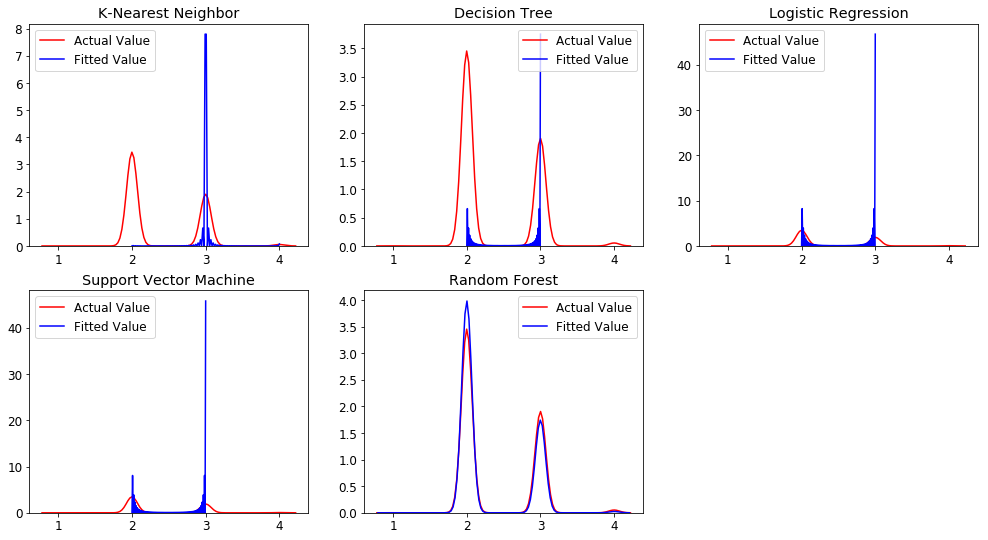

In [70]:
# Set figure size
plt.figure(figsize = (17,9))

# Set font size
from matplotlib import rcParams
rcParams['font.size'] = 12

# Set lists for plotting
number = [1,2,3,4,5]
predicted = [yhat_knn, yhat_tree, yhat_log, yhat_svm, yhat_forest]
title = ['K-Nearest Neighbor','Decision Tree','Logistic Regression','Support Vector Machine','Random Forest']

# Using for-loop to plot the distribution of actual severity and predicted severity under each algorithm
for i, yhat, tit in zip(number, predicted,title):
    plt.subplot(2,3,i)
    sns.distplot(y_test,hist=False, color="r", label="Actual Value")
    sns.distplot(yhat,hist=False, color="b", label="Predicted Value")
    plt.title(tit)
    

## 5. Conclusion

In this project, I discover the determinants of traffic accident severity through exploratory data analysis. I find that humidity, pressure, temperature, wind speed, and weather conditions are useful to predict the severity, while weekdays (i.e. Sunday, Monday, etc.) and period of day (i.e. daytime & night) are not. Then, I use five classification algorithms to train five classification models using training data. Afterwards, I predict severity and calculate the accuracy score of each model through test dataset. The model evaluation results indicate that SVM and Random Forest have the highest accuracy scores which are suggested by Jaccard index and F1-score, respecively. The distribution plot In contrast, Decision Tree provides least accurate prediction in that it has lowest Jaccard and F1-score.